In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Chargement des données 


In [2]:
data = pd.read_csv("IRIS.csv")
print(data.head(5))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
data.columns
df = data
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
# fonction pour catégoriser la colonnes , et pourvoir utiliser .cat.codes dans scatter
df['species'] = df['species'].astype('category')


Visualisation des donneés

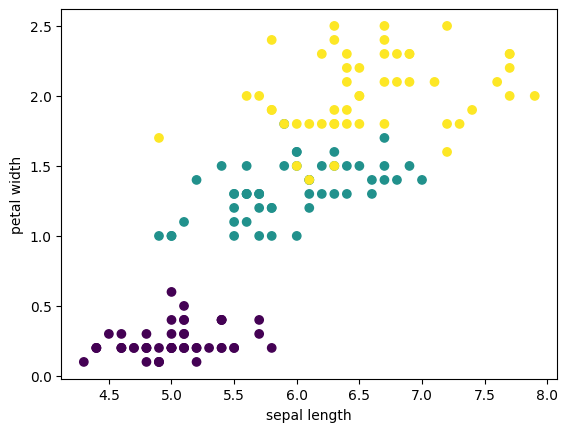

In [5]:
plt.scatter( df["sepal_length"], df["petal_width"], c= df["species"].cat.codes)
plt.xlabel("sepal length")
plt.ylabel("petal width")
plt.show()

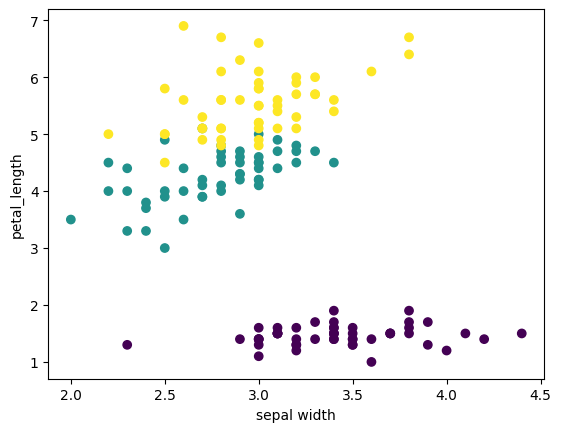

In [6]:
plt.scatter(df['sepal_width'], df['petal_length'], c = df["species"].cat.codes)
plt.xlabel("sepal width")
plt.ylabel("petal_length")
plt.show()

Séparations des donneés en enssemble de test et entrainement

In [7]:
from sklearn.model_selection import train_test_split

x= df.drop('species', axis = 1)
y = df["species"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

Choix du modéle de classification 

Entrainement du modèle 

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree =  DecisionTreeClassifier(criterion='entropy', random_state= 42)
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Evaluation du modèle 

In [9]:
from sklearn.metrics import accuracy_score

y_pred = tree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

error = 1 - accuracy

print("T'aux d'erreur", error)


T'aux d'erreur 0.0


Evaluation du model avec la méthode k-fold cross validation

In [10]:
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(criterion='entropy', random_state= 42)
scores = cross_val_score(tree, x, y, cv=5)
print("Accuracy moyenne: ", scores.mean())
print("Ecart type: ", scores.std())

Accuracy moyenne:  0.9533333333333334
Ecart type:  0.03399346342395189


Recherche des meilleure hyperparamètres avec la méthode GridSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV

# Liste des valeurs des hyperparamètres a tester

param_grid = {
    'max_depth' :[2,3,4,5,6,7,8,9,10], 
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10], 
    'criterion' : ['gini', 'entropy']
}


#Initialisation du modèle

tree = DecisionTreeClassifier()

#Recherche des meilleurs hyperparamètres avec la validation croisé

grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5,  scoring= 'accuracy')
grid_search.fit(x, y)

#Affichage des meilleurs hyperparamètres et de la meilleure performance

print("Meilleures hyperparamètres : ")
print(grid_search.best_params_)
print("Meilleure performance : ")
print(grid_search.best_score_)


Meilleures hyperparamètres : 
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}
Meilleure performance : 
0.9733333333333334


Visualisation du modele de Decision Tree

sauveguarde du model avec pickle

In [13]:
import pickle

# sauveguarde du model dans un fichier sous format .pkl

with open ('model.pkl', 'wb') as file:
    pickle.dump(best_tree, file)